In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv('blogtext.csv')  # Replace 'your_file.csv' with the actual file name

# Convert 'age' column to numeric, coercing errors to NaN for non-numeric values
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Filter rows where age is a numeric value and greater than or equal to 18
filtered_df = data[(data['age'] >= 18) & ~data['age'].isna()]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('blogtext_over18.csv', index=False)  # Replace 'output_file.csv' with your desired output file name


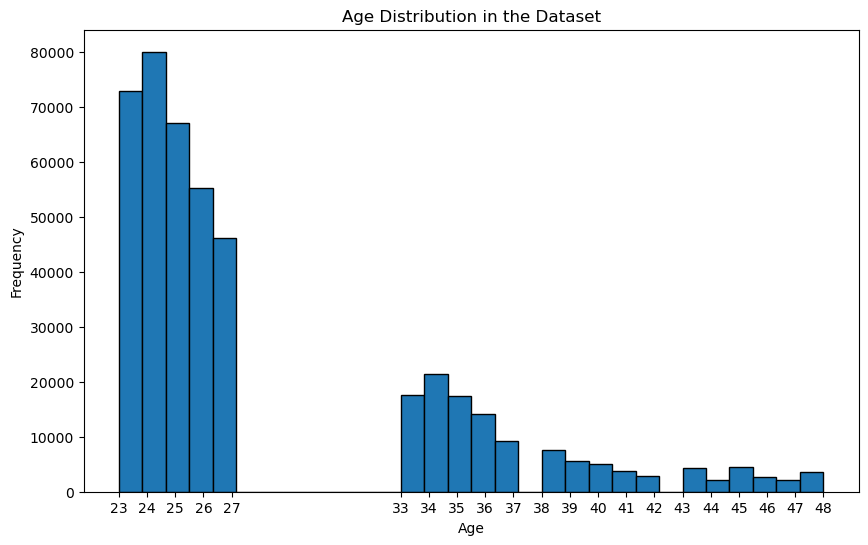

In [3]:
# Read the CSV file into 'data' for over 18 year data
data = pd.read_csv('blogtext_over18.csv')  # Use the name of your filtered CSV file

# Plot histogram with labeled ages
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Label each age on the x-axis
plt.xticks(sorted(data['age'].unique()))

# Show the plot
plt.show()


In [4]:


# Load your dataset
df = pd.read_csv('blogtext_over18.csv')

In [5]:
import pandas as pd
import numpy as np

# Assuming df is your original dataset
# Assuming 'age' is a numeric column representing the age values

# Set the seed for reproducibility
np.random.seed(42)

# Function to sample 2500 instances for each age value
def sample_by_age(df, num_samples=2500):
    sampled_data = pd.DataFrame()
    
    for age_value in df['age'].unique():
        age_subset = df[df['age'] == age_value]
        
        if len(age_subset) > num_samples:
            # Randomly sample num_samples instances if available
            age_subset_sampled = age_subset.sample(num_samples, random_state=42)
        else:
            # Use all instances if there are fewer than num_samples
            age_subset_sampled = age_subset
        
        sampled_data = pd.concat([sampled_data, age_subset_sampled], ignore_index=True)
    
    return sampled_data

# Sample 2500 instances for each age value
sampled_df = sample_by_age(df, num_samples=2500)

# Check the distribution of ages in the sampled dataset
print(sampled_df['age'].value_counts())
sampled_df

age
33    2500
25    2500
40    2500
43    2500
38    2500
42    2500
46    2500
36    2500
35    2500
39    2500
48    2500
41    2500
34    2500
45    2500
27    2500
24    2500
26    2500
37    2500
23    2500
47    2207
44    2044
Name: count, dtype: int64


,id,gender,age,topic,sign,date,text
0,1855313,female,33,Science,Aries,"23,July,2004",First a Praying Mantis pays a midnight&...
1,597870,female,33,Internet,Taurus,"13,July,2004","Sorry for posting again so soon, but..."
2,3387580,female,33,indUnk,Virgo,"01,June,2004",I am withering away! I can feel ...
3,3482303,female,33,indUnk,Pisces,"15,June,2004",I used to cry myself to sleep...
4,2230451,male,33,indUnk,Capricorn,"03,November,2003",urlLink Yahoo! News - China'...
...,...,...,...,...,...,...,...
51746,3849298,female,48,indUnk,Gemini,"20,July,2004",Today was long for no particular reason. W...
51747,3146636,female,48,indUnk,Pisces,"13,May,2004",Went out with friends and friends of friend...
51748,3146636,female,48,indUnk,Pisces,"27,July,2004",urlLink work in progress: glacial uphea...
51749,595404,female,48,indUnk,Pisces,"25,January,2003","ok, so mean mamma is thinking about goi..."


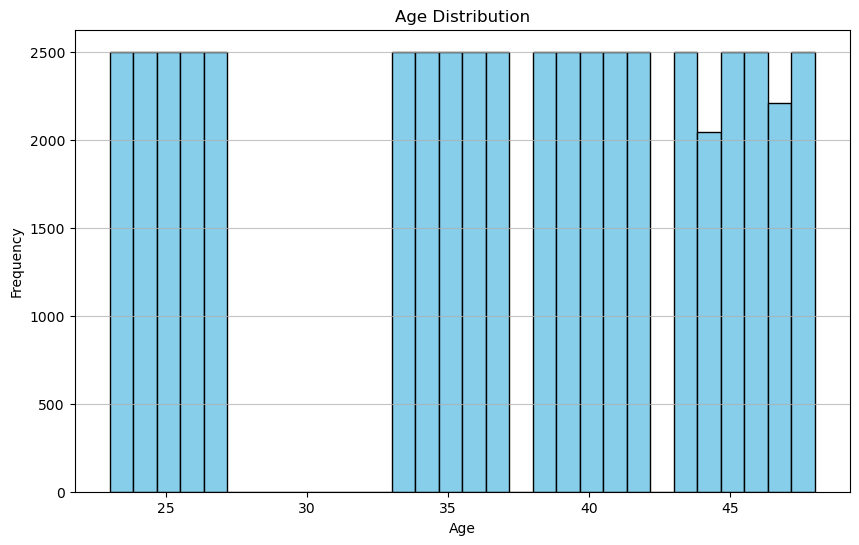

In [6]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [7]:
sampled_df.to_csv('blogtext_over18_even2500.csv', index=False)  # Replace 'output_file.csv' with your desired output file name

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/surbhitkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


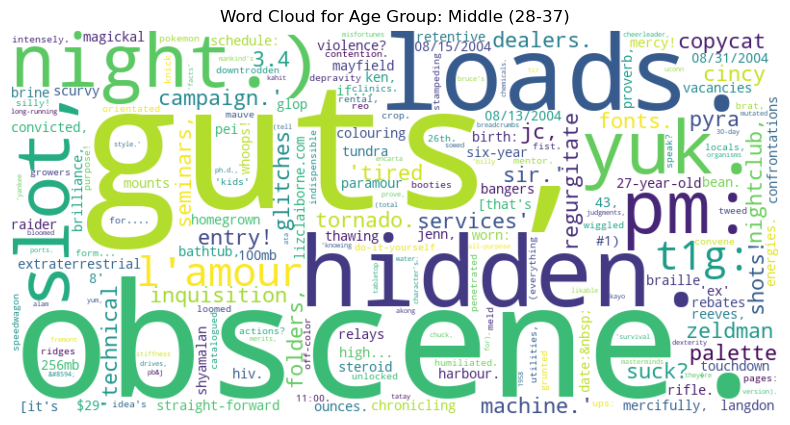

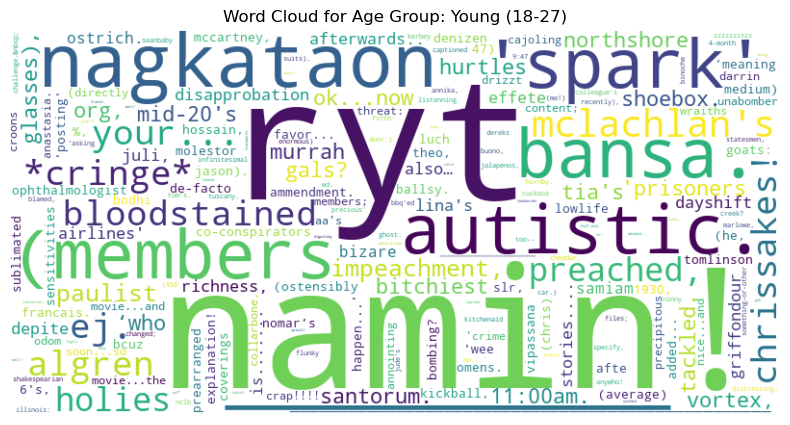

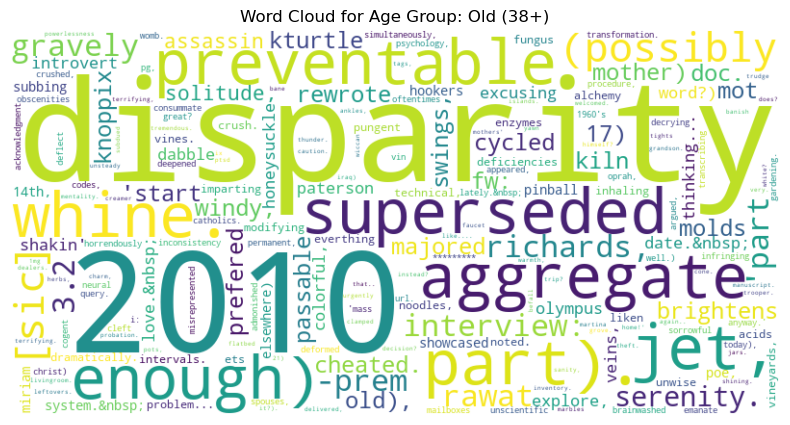

In [8]:


# Load NLTK stop words
nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('blogtext_over18.csv')

# Function to generate word clouds for a specific age group
def generate_word_cloud(age_group):
    # Filter data for the given age group
    age_group_df = df[df['age_group'] == age_group]
    
    # Concatenate text from all rows in the age group
    text = ' '.join(age_group_df['text'].values)

    # Convert all text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = text.split()

    # Remove stop words and other specified words
    words = [word for word in words if word.lower() not in STOPWORDS and word.lower() not in stop_words_nltk]

    # Count word frequencies
    word_freq = Counter(words)

    # Determine the top 10% most common words to remove
    num_top_words = int(len(word_freq) * 0.1)
    top_words = set([word for word, _ in word_freq.most_common(num_top_words)])

    # Remove the top 10% most common words
    words = [word for word in words if word not in top_words]

    # Recount word frequencies
    word_freq = Counter(words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, contour_width=3, contour_color='steelblue')

    # Generate the word cloud
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Age Group: {age_group}')
    plt.show()

# Add age groups to the dataframe based on age
df['age_group'] = pd.cut(df['age'], bins=[17, 27, 37, 100], labels=['Young (18-27)', 'Middle (28-37)', 'Old (38+)'])

# Generate word clouds for each age group
for age_group in df['age_group'].unique():
    generate_word_cloud(age_group)
